**Cosine similarity:** The cosine similarity is a technique to find the similarity between the two vectors by calculating the cosine of the angle between them. As we know, the cosine of a zero-degree angle is 1 (meaning the cosine similarity of two identical vectors is 1), while the cosine of 180 degrees is -1 (meaning the cosine of two opposite vectors is -1). Thus, we can use this cosine angle to find the similarity between the vectors from 1 to -1. To use this technique in finding text similarity, we convert text into vectors using one of the previously discussed techniques and find the similarity between the vectors of the text. This is calculated as follows:

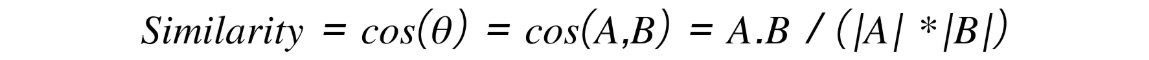

Here, A and B are two vectors, A.B is the dot product of two vectors, and |A| and |B| are the magnitude of two vectors.

						

**Jaccard similarity:** This is another technique that's used to calculate the similarity between the two texts, but it only works on BoW vectors. The Jaccard similarity is calculated as the ratio of the number of terms that are common between two text documents to the total number of unique terms present in those texts.Consider the following example. Suppose there are two texts:

Consider the following example. Suppose there are two texts:

Text 1: I like detective Byomkesh Bakshi.

Text 2: Byomkesh Bakshi is not a detective; he is a truth seeker.

The common terms are "Byomkesh," "Bakshi," and "detective."

The number of common terms in the texts is three.

The unique terms present in the texts are "I," "like," "is," "not," "a," "he," "is," "truth," and "seeker." So, the number of unique terms is nine.

Therefore, the Jaccard similarity is 3/9 = 0.3.

In [8]:
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
lemmatizer = WordNetLemmatizer()

Create a function to extract the Jaccard similarity between a pair of sentences by adding the following code

In [9]:
def extract_text_similarity_jaccard(text1, text2):
    """
    This method will return Jaccard similarity between two texts
    after lemmatizing them.
    :param text1: text1
    :param text2: text2
    :return: similarity measure
    """
    lemmatizer = WordNetLemmatizer()
    words_text1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text1)]
    words_text2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text2)]
    nr = len(set(words_text1).intersection(set(words_text2)))
    dr = len(set(words_text1).union(set(words_text2)))
    jaccard_sim = nr / dr
    return jaccard_sim


In [10]:
pair1 = ["What you do defines you", "Your deeds define you"]
pair2 = ["Once upon a time there lived a king.", "Who is your queen?"]
pair3 = ["He is desperate", "Is he not desperate?"]

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

To check the Jaccard similarity between the statements in pair1, write the following code:

In [15]:
extract_text_similarity_jaccard(pair1[0],pair1[1])

0.14285714285714285

In [16]:
extract_text_similarity_jaccard(pair2[0],pair2[1])

0.0

In [17]:
extract_text_similarity_jaccard(pair3[0],pair3[1])

0.6

In [18]:
def get_tf_idf_vectors(corpus):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_results = tfidf_vectorizer.fit_transform(corpus).todense()
    return tfidf_results

In [19]:
corpus = [pair1[0], pair1[1], pair2[0], pair2[1], pair3[0], pair3[1]]
tf_idf_vectors = get_tf_idf_vectors(corpus)


In [20]:
cosine_similarity(tf_idf_vectors[0],tf_idf_vectors[1])

array([[0.3082764]])

In [21]:
cosine_similarity(tf_idf_vectors[2],tf_idf_vectors[3])

array([[0.]])

In [22]:
cosine_similarity(tf_idf_vectors[4],tf_idf_vectors[5])

array([[0.80368547]])

So, in this exercise, we learned how to check the similarity between texts. As you can see, the texts "He is desperate" and "Is he not desperate?" returned similarity results of 0.80 (meaning they are highly similar), whereas sentences such as "Once upon a time there lived a king." and "Who is your queen?" returned zero as their similarity measure.